### NAMA: MUHAMMAD RIO PERDANA
### NIM : 09011382328150

# Membaca dataset dengan mengguanakan pandas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Membaca data dengan mengguanakan pandas**

In [2]:
df = pd.read_csv('D:\Semester 3\Data Mining\Data Tugas/heart_disease_uci.csv')

**Menampilkan 5 data di atas dan 5 data di bawah**

In [3]:
display(df.head())
display(df.tail())

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0
919,920,62,Male,VA Long Beach,atypical angina,120.0,254.0,False,lv hypertrophy,93.0,True,0.0,NaN,NaN,NaN,1


**Melihat informasi tentang dataset**

In [4]:
dataset_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


jumlah data ini mempunyai 920 entry data dan 16 kolom.
juga memiliki data campuran seperti int,float dan object

**Memeriksa nilai missing dan outlier**

In [5]:
print('Nilai yang hilang')
display(df.isnull().sum())

Nilai yang hilang


id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

outliers_dict = {column: detect_outliers_iqr(df, column) for column in numerical_columns}

outliers_count = {column: len(outliers_dict[column]) for column in numerical_columns}

print('data outlier')
outliers_count


data outlier


{'age': 0,
 'trestbps': 28,
 'chol': 183,
 'thalch': 2,
 'oldpeak': 16,
 'ca': 20,
 'num': 0}

# Statistik Deskriptif

**Hitung dan tampilkan mean, median, mode, standar deviasi, variansi, skewness, dan kurtosis untuk kolom numerik.**

In [8]:
print ('Median')
display(df.median(numeric_only=True))

print ('Mode')
display(df.mode().iloc[0])

print('Standar Deviasi')
display(df.std(numeric_only=True))

print ('skewness')
display(df.skew(numeric_only=True))

print('kurtosis')
display(df.kurt(numeric_only=True))


Median


id          460.5
age          54.0
trestbps    130.0
chol        223.0
thalch      140.0
oldpeak       0.5
ca            0.0
num           1.0
dtype: float64

Mode


id                     1
age                 54.0
sex                 Male
dataset        Cleveland
cp          asymptomatic
trestbps           120.0
chol                 0.0
fbs                False
restecg           normal
thalch             150.0
exang              False
oldpeak              0.0
slope               flat
ca                   0.0
thal              normal
num                  0.0
Name: 0, dtype: object

Standar Deviasi


id          265.725422
age           9.424685
trestbps     19.066070
chol        110.780810
thalch       25.926276
oldpeak       1.091226
ca            0.935653
num           1.142693
dtype: float64

skewness


id          0.000000
age        -0.195994
trestbps    0.213334
chol       -0.613836
thalch     -0.211119
oldpeak     1.041427
ca          1.165978
num         0.968880
dtype: float64

kurtosis


id         -1.200000
age        -0.382930
trestbps    2.958664
chol        0.062273
thalch     -0.479725
oldpeak     1.127069
ca          0.199498
num        -0.104325
dtype: float64

**Hitung korelasi antar variabel numerik.**

In [9]:
numerik = df.corr(numeric_only=True)
numerik

,id,age,trestbps,chol,thalch,oldpeak,ca,num
id,1.000000,0.239301,0.052924,-0.376936,-0.466427,0.049930,0.061433,0.273552
age,0.239301,1.000000,0.244253,-0.086234,-0.365778,0.258243,0.370416,0.339596
trestbps,0.052924,0.244253,1.000000,0.092853,-0.104899,0.161908,0.093705,0.122291
chol,-0.376936,-0.086234,0.092853,1.000000,0.236121,0.047734,0.051606,-0.231547
thalch,-0.466427,-0.365778,-0.104899,0.236121,1.000000,-0.151174,-0.264094,-0.366265
oldpeak,0.049930,0.258243,0.161908,0.047734,-0.151174,1.000000,0.281817,0.443084
ca,0.061433,0.370416,0.093705,0.051606,-0.264094,0.281817,1.000000,0.516216
num,0.273552,0.339596,0.122291,-0.231547,-0.366265,0.443084,0.516216,1.000000


# Diagram heatmap variabel numerik

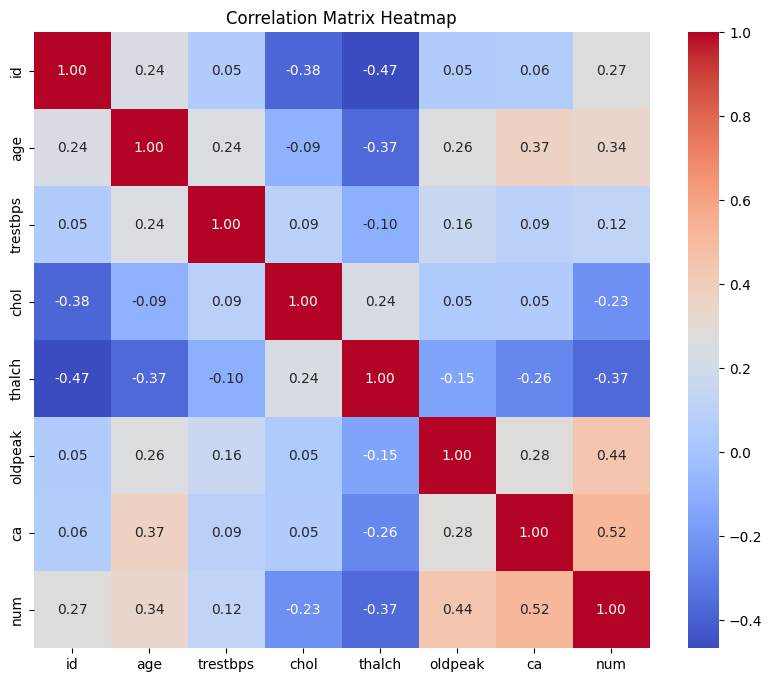

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(numerik, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()  

# Visualisasi Data 

### Buat histogram dan box plot untuk setiap variabel numerik.

**ID**

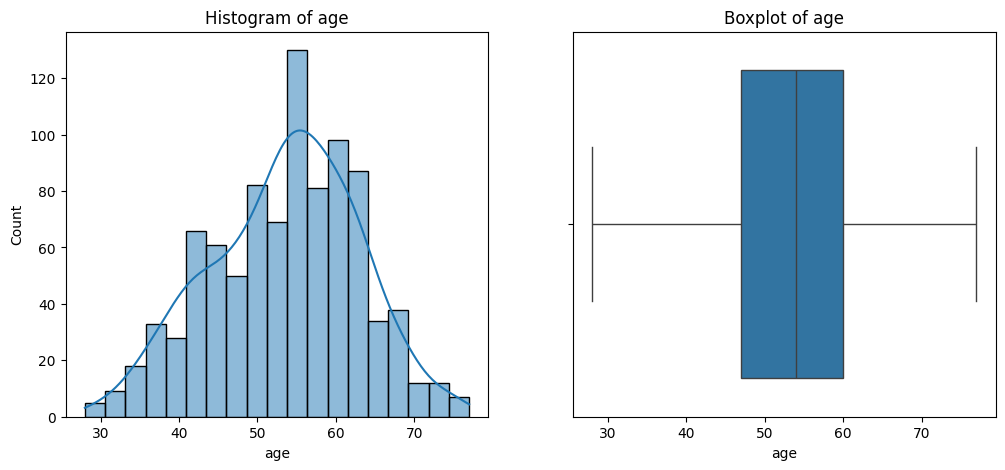

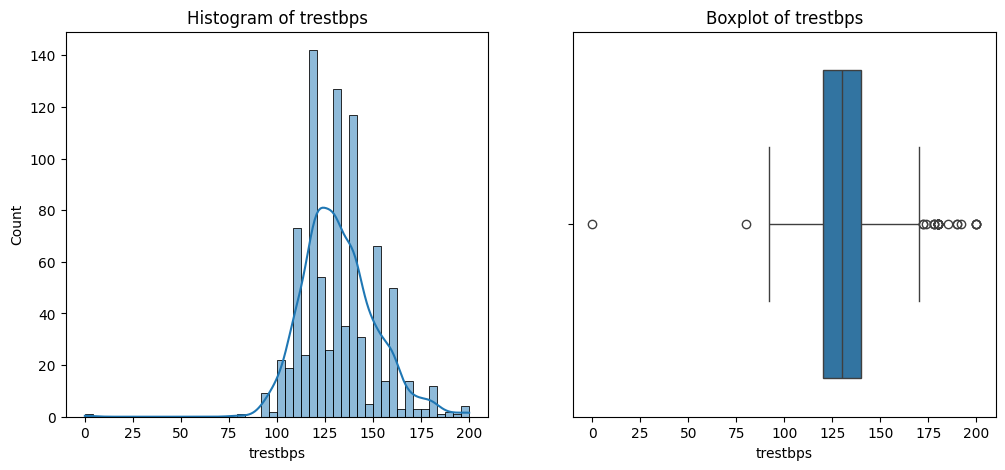

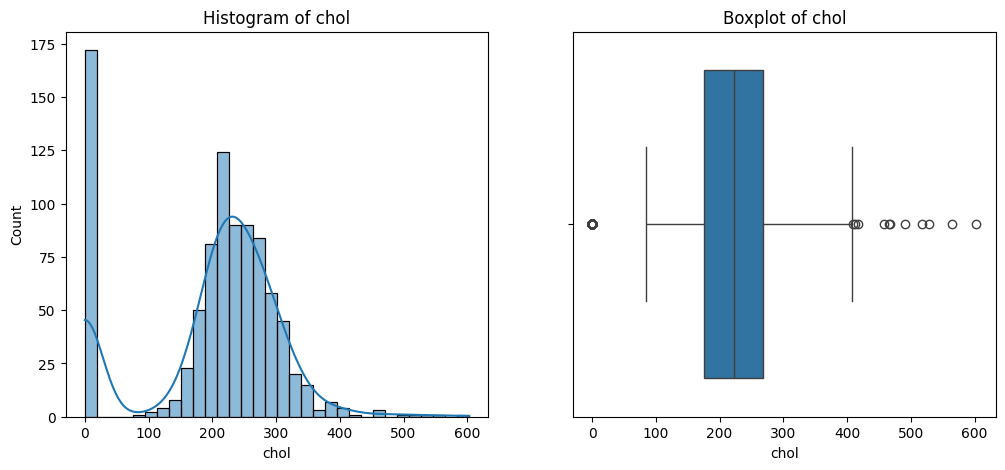

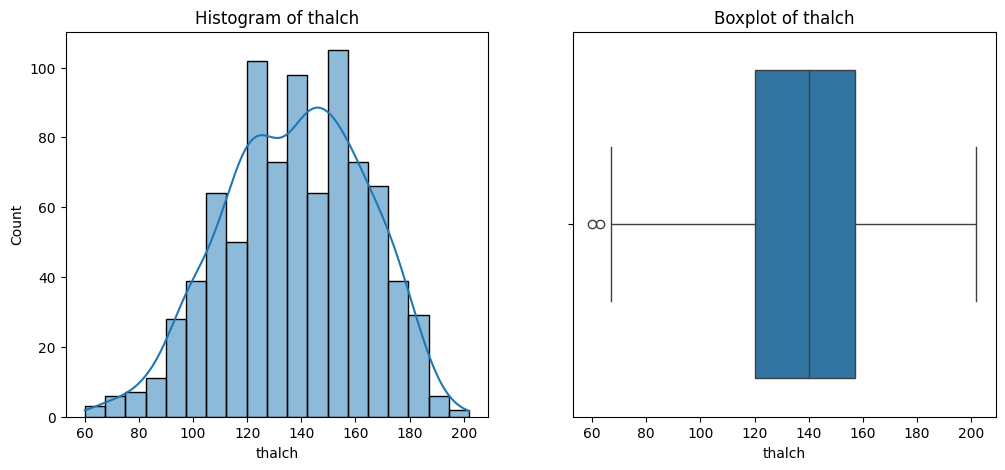

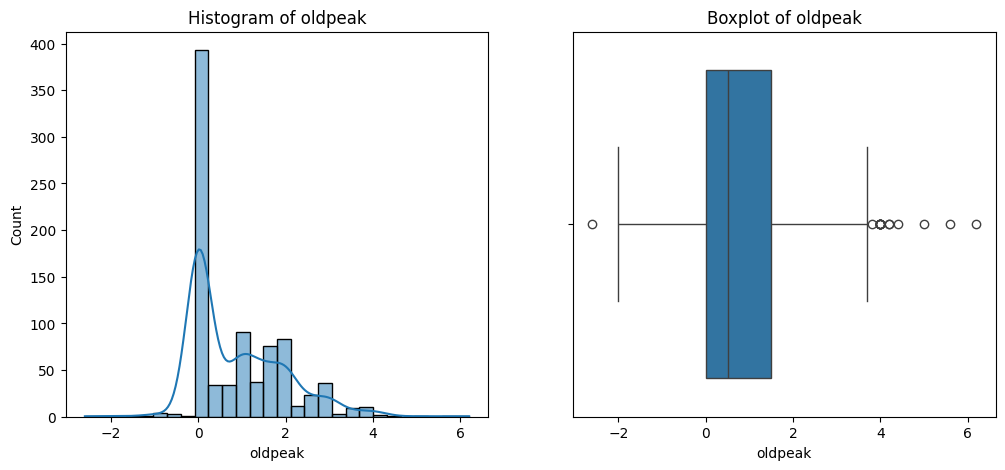

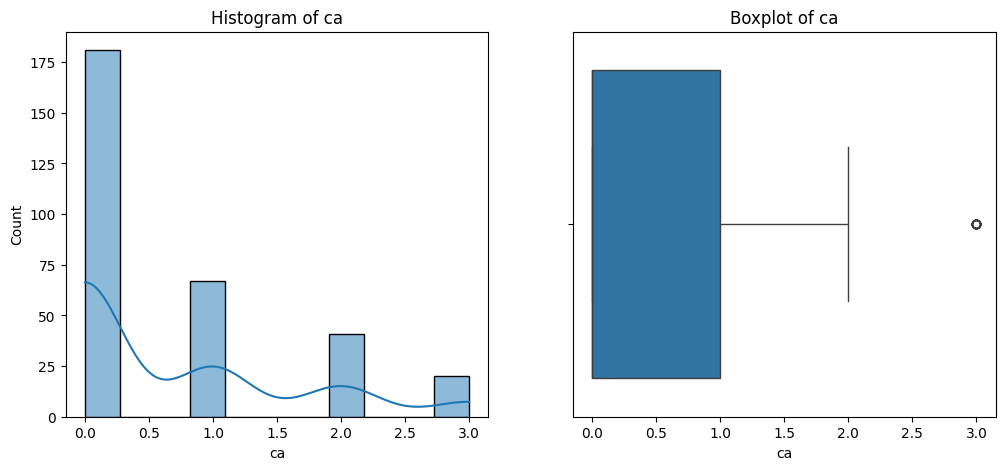

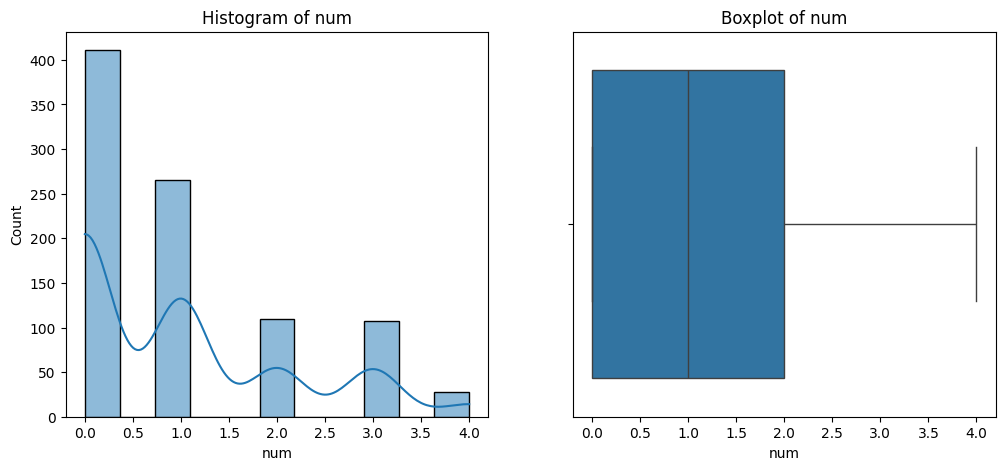

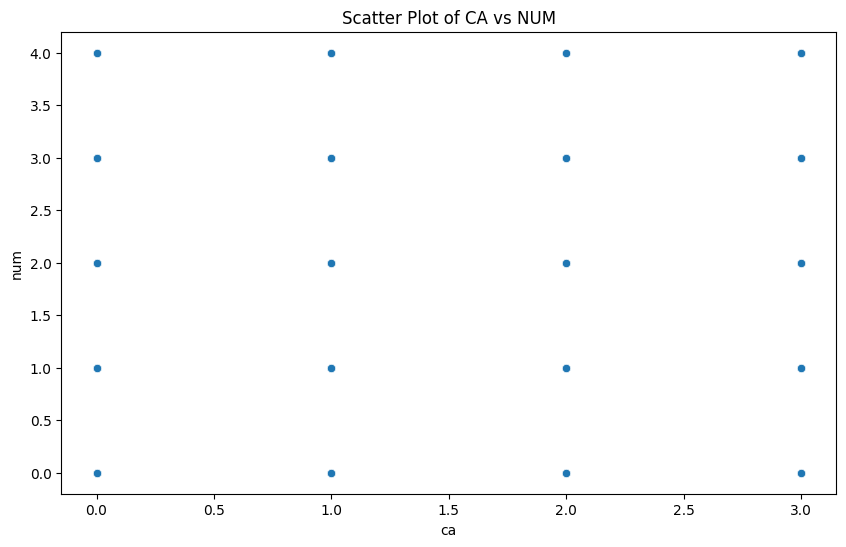

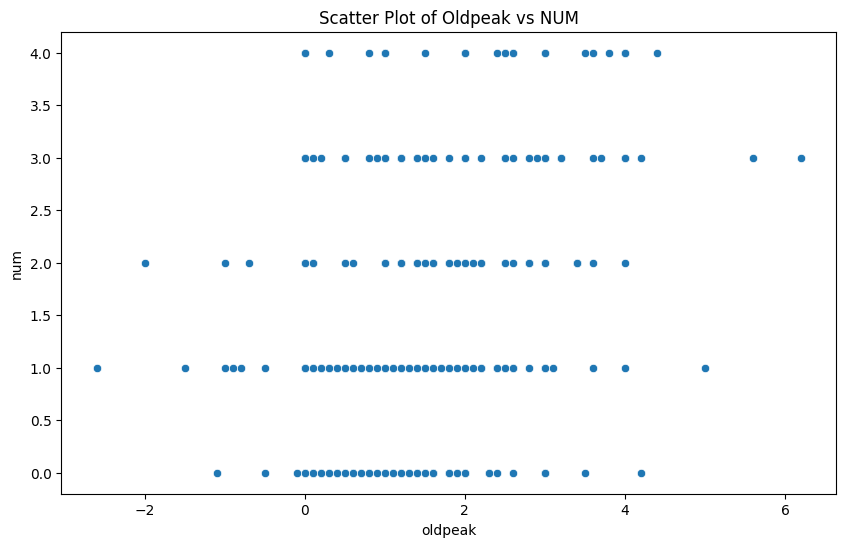

In [11]:
numerical_columns = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca', 'num']

for column in numerical_columns:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

    plt.show()


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='ca', y='num')
plt.title('Scatter Plot of CA vs NUM')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='oldpeak', y='num')
plt.title('Scatter Plot of Oldpeak vs NUM')
plt.show()


# Laporan

**Kesimpulan**

Dari eksplorasi data yang telah dilakukan, ditemukan bahwa beberapa variabel dalam dataset menunjukkan distribusi yang tidak normal, dengan keberadaan outliers yang signifikan. Misalnya, variabel seperti `chol` dan `oldpeak` memiliki distribusi yang sangat skewed ke arah kanan, yang menunjukkan adanya individu dengan nilai yang jauh lebih tinggi dibandingkan mayoritas sampel.

**Korelasi** antar variabel numerik mengungkapkan bahwa variabel `ca` dan `num`  memiliki korelasi positif yang cukup kuat, yang mengindikasikan bahwa semakin banyak pembuluh darah yang terkena, semakin tinggi kemungkinan diagnosa positif penyakit jantung. Selain itu, variabel `oldpeak` juga menunjukkan korelasi positif sedang dengan `num`, menandakan bahwa depresi ST yang lebih tinggi mungkin terkait dengan peningkatan risiko penyakit jantung. Temuan ini mengindikasikan bahwa `ca` dan `oldpeak` bisa menjadi prediktor penting dalam model yang bertujuan untuk memprediksi adanya penyakit jantung. 

*Terdapat* juga beberapa nilai missing dalam dataset, terutama pada variabel seperti `ca`, `thal`, dan `slope`, yang perlu ditangani sebelum melanjutkan ke analisis lebih lanjut atau pembuatan model prediktif.